In [161]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import RegularGridInterpolator
import pandas as pd
import random
import math
import copy
from typing import Annotated, Any, Callable
from pydantic import BaseModel, Field, WithJsonSchema
import pydantic
import ipywidgets as widgets
import random
from typing import (
    Any, Callable, Optional, Sequence, Union, Tuple, Dict, List
)

In [167]:
%load_ext autoreload
%autoreload 2

import sys
for p in ['../src']:
    if p not in sys.path:
        sys.path.append(p)
        
import spikeml as sml
from spikeml.utils.nb_util import xdisplay, Markup
from spikeml.utils.fmt_utils import fmt_float, fmt_int

from spikeml.core.signal import signal_dc, signal_pulse, encode1_onehot, encode_onehot, signal_ranges, signal_unique, signal_ranges, signal_changes, \
    stats_per_input, mean_per_input, sum_per_input, var_per_input, std_per_input

from spikeml.plot.plot_util import plot_hist, plot_data, plot_lidata, plot_input, plot_xt, plot_mt, plot_spikes, imshow_matrix, imshow_nmatrix


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# signal_pulse

[[2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0]]


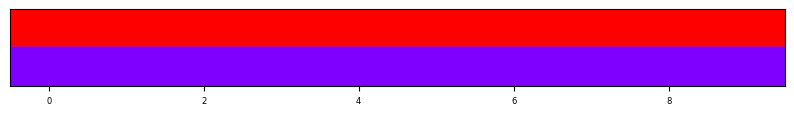

[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


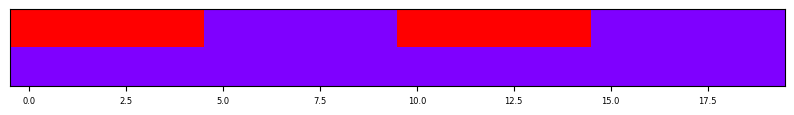

[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


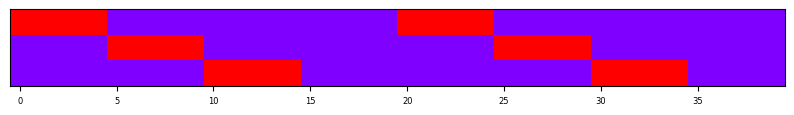

[[1.0, 1.0, 0.0], [1.0, 1.0, 0.0], [1.0, 1.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]


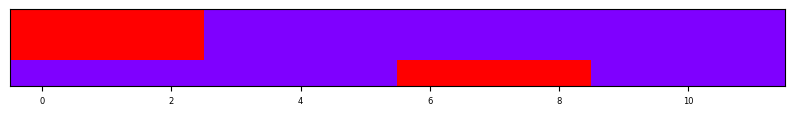

In [ ]:
def test_signal_pulse():
    ss = signal_dc(2, T=10, s=0, value=2)
    print(ss.tolist())
    plot_xt(ss)
    ss = signal_pulse(2, T=5, L=2, s=[0,-1], value=1)
    print(ss.tolist())
    plot_xt(ss)
    ss = signal_pulse(3, T=5, L=2, s=[0,1,2,-1], value=1)
    print(ss.tolist())
    plot_xt(ss)

def test_signal_pulse2():
    s0 = np.array([1, 1, 0])
    ss = signal_pulse(3, T=3, L=1, s=[s0,-1,2,-1], value=1)
    print(ss.tolist())
    plot_xt(ss)

def test_signal_pulse3():
    s3_3 = np.array([1, 1, 0])*.5
    s5_0 = np.array([1, 1, 0, 0, 0])*.5
    s5_1 = np.array([0, 0, 0, 1, 1])*.5
    ss_0 = signal_pulse(2, T=200, L=1, s=[0], value=.5)
    ss_0_ = signal_pulse(2, T=100, L=1, s=[0,-1], value=.5)
    ss_1 = signal_pulse(2, T=200, L=1, s=[1], value=.5)
    ss_1_ = signal_pulse(2, T=100, L=1, s=[1,-1], value=.5)
    ss_0_1 = signal_pulse(2, T=100, L=1, s=[0,1,-1], value=.5)
    ss_0_1 = signal_pulse(2, T=100, L=1, s=[0,1,-1], value=.5)
    ss_0__1 = signal_pulse(2, T=50, L=1, s=[0,0,-1,1,1,-1], value=.5)
    ss_0__1__2 = signal_pulse(3, T=50, L=1, s=[0,0,-1,1,1,-1,2,2,-1], value=.5)
    ss_0_1_x2 = signal_pulse(2, T=100, L=2, s=[0,1,-1], value=.5)
    ss_0_1_x3 = signal_pulse(2, T=50, L=3, s=[0,-1,1,-1,-1], value=.5)
    ss_0__1_x2 = signal_pulse(2, T=50, L=2, s=[0,0,-1,1,1,-1], value=.5)
    ss_0__1__2 = signal_pulse(3, T=50, L=2, s=[0,0,-1,1,1,-1,2,2,-1], value=.5)
    ss_0__4 = signal_pulse(5, T=50, L=2, s=[0,0,-1,1,1,-1,2,2,-1,3,3,-1,4,4,-1], value=.5)
    ss3_3__0 = signal_pulse(3, T=50, L=2, s=[s3_3,s3_3,-1,2,2,-1], value=.5)
    plot_xt(ss3_3__0)

test_signal_pulse()
test_signal_pulse2()

# encode_onehot

In [19]:

def test_encode_onehot():
    s = encode1_onehot(0, 5)
    print(s)
    ss = signal_pulse(3, T=5, L=2, s=[0,1,2,-1], value=1)
    ss = np.array([i for i in range(0,3)])
    print('ss:', ss)
    ess = encode_onehot(ss, 3)
    print('ess:', ess)
    

test_encode_onehot()


[1. 0. 0. 0. 0.]
ss: [0 1 2]
ess: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# signal_unique

[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


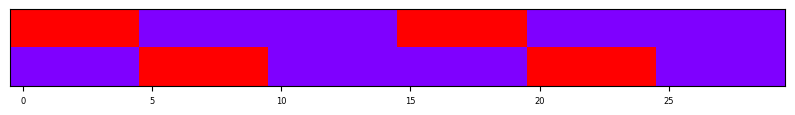

[ 5 10 15 20 25]
[[1. 0.]
 [0. 1.]
 [0. 0.]]
0 : [1. 0.] [(0, 4), (15, 19)]
1 : [0. 1.] [(5, 9), (20, 24)]
2 : [0. 0.] [(10, 14), (25, 29)]


In [25]:
def test_signal_unique():
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    print(ss.tolist())
    plot_xt(ss)
    print(signal_changes(ss))
    u = signal_unique(ss)
    print(u)
    ranges = signal_ranges(ss, ref=u, E=0)
    #print(ranges)
    for i,s in enumerate(u):
        print(i, ':', u[i], ranges[i])
        
test_signal_unique()


# mean_per_input

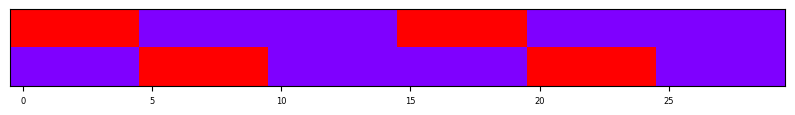

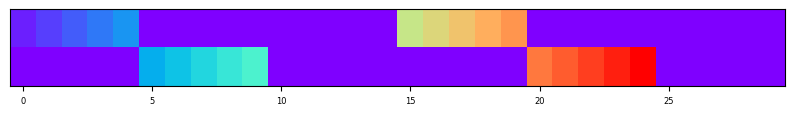

0: [1. 0.] (#10); Mean: 2.6250; Var: 14.1719; Std: 3.7646
1: [0. 1.] (#10); Mean: 3.8750; Var: 22.2969; Std: 4.7220
2: [0. 0.] (#10); Mean: 0.0000; Var: 0.0000; Std: 0.0000


In [137]:
def make_data(ss=None):
    data = ss**2*.5
    for i in range(0, data.shape[0]):
        r = np.random.normal(loc=0, scale=1, size=data.shape[-1])
        data[i] *= (i+1) #+ r
    return data


def test_stats_per_input():
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    #print(ss.tolist())
    plot_xt(ss)
    data = make_data(ss)
    plot_xt(data, vmin=data.min(), vmax=data.max())
    #print(data)
    ss_, size, mean_ = mean_per_input(data, ss)
    ss_, size, var_ = var_per_input(data, ss)
    ss_, size, std_ = std_per_input(data, ss)
    for i in range(0, ss_.shape[0]):
        print(f'{i}: {ss_[i]} (#{size[i]}); Mean: {mean_[i]:.4f}; Var: {var_[i]:.4f}; Std: {std_[i]:.4f}')

test_stats_per_input()

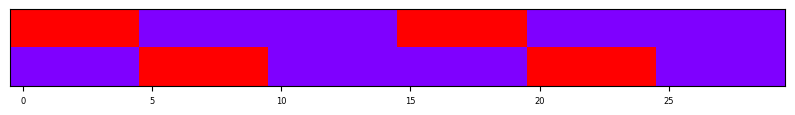

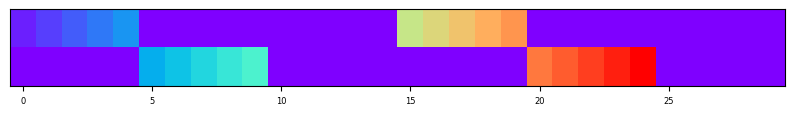

0: [1. 0.]: [(0, 4), (15, 19)] : Sum: [array([7.5, 0. ]), array([45.,  0.])]; Mean: [0.75, 4.5];  Var: [0.8125, 20.5]; Std: [0.9013878188659973, 4.527692569068709]
1: [0. 1.]: [(5, 9), (20, 24)] : Sum: [array([ 0., 20.]), array([ 0. , 57.5])]; Mean: [2.0, 5.75];  Var: [4.25, 33.3125]; Std: [2.0615528128088303, 5.771698190307598]
2: [0. 0.]: [(10, 14), (25, 29)] : Sum: [array([0., 0.]), array([0., 0.])]; Mean: [0.0, 0.0];  Var: [0.0, 0.0]; Std: [0.0, 0.0]


In [139]:
def test_stats_per_input2():
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    #print(ss.tolist())
    plot_xt(ss)
    data = make_data(ss)
    plot_xt(data, vmin=data.min(), vmax=data.max())      
    def f(a):
        #print(a)
        return a.sum()
        
    ref, ranges, sum_ = stats_per_input(data, ss, f=f, aggregate=False)
    _, _, sum_ = sum_per_input(data, ss, aggregate=False)

    _, _, mean_ = mean_per_input(data, ss, aggregate=False)
    _, _, var_ = var_per_input(data, ss, aggregate=False)
    _, _, std_ = std_per_input(data, ss, aggregate=False)
    for i in range(0, ref.shape[0]):
        print(f'{i}: {ref[i]}: {ranges[i]} : Sum: {sum_[i]}; Mean: {mean_[i]};  Var: {var_[i]}; Std: {std_[i]}')


test_stats_per_input2()


[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


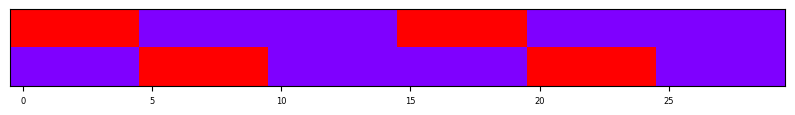

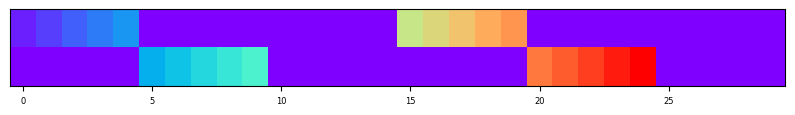

0: [1. 0.] (#10); CC:
[[ 1.         -0.43181048]
 [-0.43181048  1.        ]]
1: [0. 1.] (#10); CC:
[[ 1.         -0.02222599]
 [-0.02222599  1.        ]]
2: [0. 0.] (#10); CC:
[[1.         0.02210308]
 [0.02210308 1.        ]]


In [ ]:
def test_corr_per_input():
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    #print(ss.tolist())
    plot_xt(ss)
    data = make_data(ss)
    plot_xt(data, vmin=data.min(), vmax=data.max())        
    def f(a):
        #print(a)
        return np.corrcoef(a, rowvar=False)
        
    ss_, size, cc_ = stats_per_input(data, ss, lambda a: np.corrcoef(a, rowvar=False), E=0)
    for i in range(0, ss_.shape[0]):
        print(f'{i}: {ss_[i]} (#{size[i]}); CC:\n{cc_[i]}')

test_corr_per_input()

# Spikes

SSensorParams:g=1,e_err=5,vmin=0,vmax=1,e_z=2,pf=1,pmax=1,upsample_method=UpsampleMethod.REPEAT


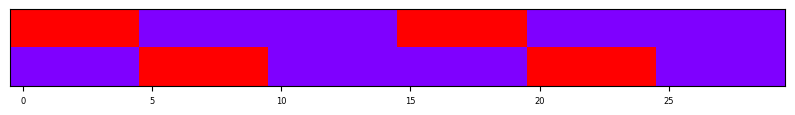

0: [1. 0.] (#10); N:[7 0]  ([1.00, 0.00] ; [1.00, 0.00])
1: [0. 1.] (#10); N:[0 7]  ([0.00, 1.00] ; [0.00, 1.00])
2: [0. 0.] (#10); N:[0 0]  ([0.00, 0.00] ; [0.50, 0.50])
0: [1. 0.] ([(0, 4), (15, 19)]): N: [[4, 0], [3, 0]] ([[1.00, 0.00], [1.00, 0.00]] ; [[0.98, 0.02], [0.95, 0.05]])
1: [0. 1.] ([(5, 9), (20, 24)]): N: [[0, 4], [0, 3]] ([[0.00, 1.00], [0.00, 1.00]] ; [[0.02, 0.98], [0.05, 0.95]])
2: [0. 0.] ([(10, 14), (25, 29)]): N: [[0, 0], [0, 0]] ([[0.00, 0.00], [0.00, 0.00]] ; [[0.50, 0.50], [0.50, 0.50]])


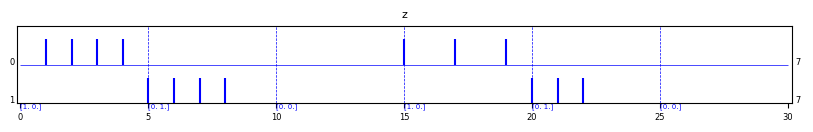

In [200]:
from spikeml.core.spikes import pspike, spike
from spikeml.utils.fmt_utils import fmt_float, fmt_int
from scipy.special import softmax
from spikeml.utils.vector import normalize_last

def make_spikes(ss, params):
    data = []
    for t in range(0,ss.shape[0]):
        s = ss[t]
        sz = spike(s, params)
        #print(t, s, sz)
        data.append(sz)
    return data    

def test_spike_stats():
    params = SSensorParams()
    print(params.fmt())
    n = 5
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    #print(ss.tolist())
    plot_xt(ss)
    data = make_spikes(ss, params)
    #print(data)        
    ref, size, n_ = stats_per_input(data, ss, lambda a: np.sum(a, axis=0), E=0)
    for i in range(0, ref.shape[0]):
        ni = np.array(n_[i])
        p = normalize_last(ni)
        p_ = softmax(ni, axis=-1)
        print(f'{i}: {ref[i]} (#{size[i]}); N:{n_[i]}  ({fmt_float(p, 2)} ; {fmt_float(p_, 2)})')

    ref, ranges, n_ = sum_per_input(data, ss, E=0, aggregate=False)
    for i in range(0, ref.shape[0]):
        ni = np.array(n_[i])
        p = normalize_last(ni)
        p_ = softmax(ni, axis=-1)
        print(f'{i}: {ref[i]} ({ranges[i]}): N: {fmt_int(n_[i])} ({fmt_float(p, 2)} ; {fmt_float(p_, 2)})')

        #  {fmt_float(softmax(n_[i]), 2)}


    plot_spikes(data, title='z', name=None, callback=lambda ax: plot_input(ss,ax=ax, va='top', ypos=0))

test_spike_stats()

SSensorParams({'g': 1, 'e_err': 5, 'vmin': 0, 'vmax': 1, 'name': None, 'e_z': 2, 'pf': 1, 'pmax': 1, 'input_size': None})
0: [1. 0.] (#20); N:[[4, 10], [14, 18]]
1: [0. 1.] (#20); N:[[1, 8], [16, 17]]
0: [1. 0.] : ([(0, 9), (20, 29)]); N:[[[4, 6], [8, 10]], [[0, 4], [6, 8]]]
1: [0. 1.] : ([(10, 19), (30, 39)]); N:[[[1, 5], [9, 7]], [[0, 3], [7, 10]]]


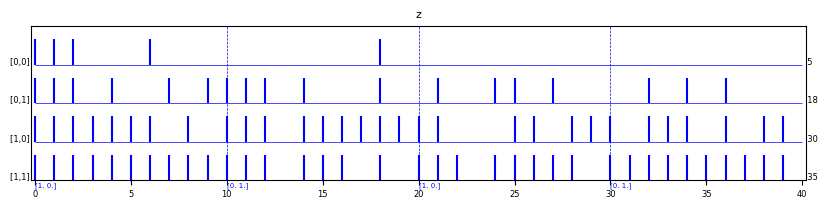

In [160]:
from spikeml.utils.fmt_utils import fmt_floats, fmt_int
from spikeml.core.signal import signal_dc, signal_pulse, encode1_onehot, encode_onehot, signal_ranges, signal_unique, signal_ranges, signal_changes, \
    stats_per_input, mean_per_input, sum_per_input, var_per_input, std_per_input

def test_conn_spikes(T=20, n=2):
    params = SSensorParams()
    print(params)
    s = np.linspace(.1,params.vmax,num=n*n)
    M = s.reshape(n, n)
    ss = signal_pulse(n, T=T/2, L=2, s=[0,1], value=1)
    #print(ss)
    data = []
    for t in range(0,ss.shape[0]):
        cz = spike(M, params)
        #print(t, M, cz)
        data.append(cz)
    
    ss_, size, n_ = sum_per_input(data, ss)
    for i in range(0, ss_.shape[0]):
        print(f'{i}: {ss_[i]} (#{size[i]}); N:{fmt_int(n_[i])}')

    ss_, ranges, n_ = sum_per_input(data, ss, aggregate=False)
    for i in range(0, ss_.shape[0]):
        print(f'{i}: {ss_[i]} : ({ranges[i]}); N:{fmt_int(n_[i])}')


    plot_spikes(data, title='z', name=None, heigth=2, callback=lambda ax: plot_input(ss,ax=ax))
    
test_conn_spikes(n=2)


SSensorParams:g=1,e_err=5,vmin=0,vmax=1,e_z=2,pf=1,pmax=1


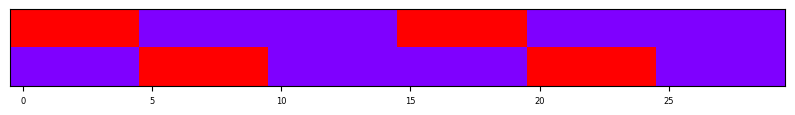

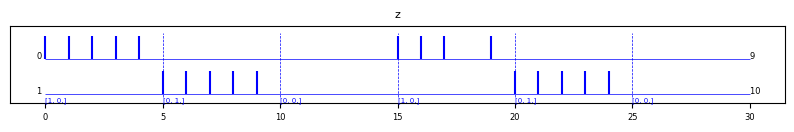

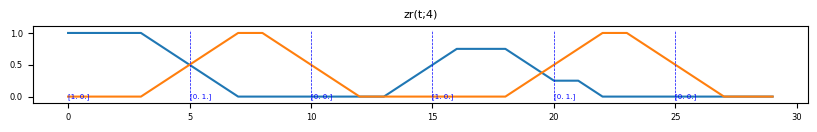

In [85]:
from scipy.ndimage import uniform_filter1d


def test_spike_rates_stats(window=4):
    params = SSensorParams()
    print(params.fmt())
    n = 5
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    #print(ss.tolist())
    plot_xt(ss)
    data = make_spikes(ss, params)
    #print(data)  
    data = np.array(data)
    zr = uniform_filter1d(data.astype(float), size=window, axis=0)
          
    plot_spikes(data, title='z', name=None, callback=lambda ax: plot_input(ss,ax=ax, va='top', ypos=0))
    plot_data(zr, title=f'zr(t;{window})', callback=lambda ax: plot_input(ss,ax=ax))


test_spike_rates_stats()


# Error

SSensorParams:g=2.0,e_err=5,vmin=0,vmax=1,e_z=2,pf=1,pmax=1


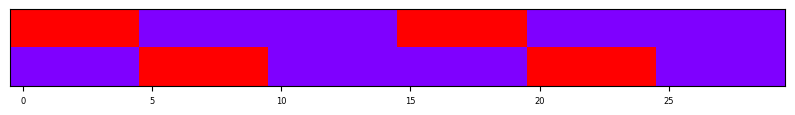

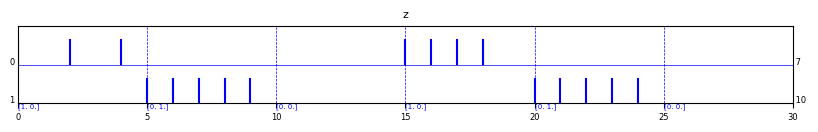

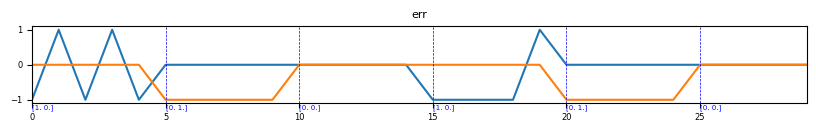

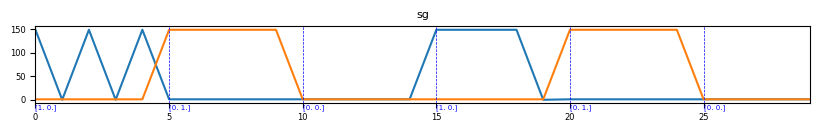

In [96]:
from spikeml.core.feedback import compute_error, compute_sg

def test_error_stats():
    params = SSensorParams(g=2)
    print(params.fmt())
    ss = signal_pulse(2, T=5, L=2, s=[0,1,-1], value=1)
    #print(ss.tolist())
    plot_xt(ss)
    zy = make_spikes(ss, params)
    zy = np.array(zy)
    #print(ss)  
    #print(zy)  
    err = compute_error(ss, zy*params.g, mean=False)
    sg = compute_sg(err, params)
    #print('err:', err)
    #print('sg:', sg)
    plot_spikes(zy, title='z', name=None, callback=lambda ax: plot_input(ss,ax=ax, va='top', ypos=0))
    plot_data(err, title=f'err', callback=lambda ax: plot_input(ss,ax=ax))
    plot_data(sg, title=f'sg', callback=lambda ax: plot_input(ss,ax=ax))


test_error_stats()


